In [2]:
import numpy as np 
import pandas as pd 
import os

/kaggle/input/clust-or-no-clut/testsetclust.csv

/kaggle/input/clust-or-no-clut/testset (1).csv

/kaggle/input/clust-or-no-clut/trainsetclust.csv


In [3]:
df=pd.read_csv("/kaggle/input/clust-or-no-clut/trainsetclust.csv")
df_test=pd.read_csv("/kaggle/input/clust-or-no-clut/testsetclust.csv")
df_test_no=pd.read_csv("/kaggle/input/clust-or-no-clut/testset (1).csv")

df contains the train dataset (highly accident prone cluster cores obtained from DBSCAN(2016-2018 included)), df_test contains the test dataset (highly accident prone cluster cores obtained from DBSCAN 2019 year only), and df_test_no contains all the accidents for the year 2019 with no clustering

In [6]:
df.shape[0]


19908

In [7]:
df_test.shape[0]


7236

In [8]:
df_test_no.shape[0]

13692

In [17]:
df.columns

Index(['tb_latitude', 'tb_longitude', 'collision_time', 'month', 'day_of_week',
       'weather_1', 'accident'],
      dtype='object')

In [18]:
df = df.sample(frac=1).reset_index(drop=True)

In [19]:
df.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1,accident
0,37.750044,-122.413842,11,12,5,7,0
1,37.781077,-122.404404,12,12,6,10,0
2,37.795532,-122.403317,10,3,7,2,1
3,37.786068,-122.392937,6,12,1,1,1
4,37.780719,-122.415316,6,1,3,1,1


In [21]:
feature_cols = ['tb_latitude', 'tb_longitude', 'collision_time', 'month', 'day_of_week']

X = df[feature_cols] 
y = df.accident 

In [22]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [22]:
X.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1
0,37.750044,-122.413842,11,12,5,7
1,37.781077,-122.404404,12,12,6,10
2,37.795532,-122.403317,10,3,7,2
3,37.786068,-122.392937,6,12,1,1
4,37.780719,-122.415316,6,1,3,1


In [23]:
df_test=df_test.sample(frac=1).reset_index(drop=True)

In [24]:
df_test.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1,accident
0,37.783101,-122.419182,5,5,2,2,0
1,37.752295,-122.420682,2,4,3,10,0
2,37.788699,-122.420307,1,5,7,10,0
3,37.774546,-122.409512,6,9,1,1,1
4,37.790881,-122.410623,5,6,5,1,0


In [25]:
df_test_no=df_test_no.sample(frac=1).reset_index(drop=True)

In [30]:
X_test = df_test[feature_cols] # Features
y_test = df_test.accident # Target variable

In [31]:
X_test.shape[0]

7236

In [32]:
X.shape[0]

19908

Case 1 Train Set includes only the highly accident prone cluster cores obtained from DBSCAN(2016-2018 included).  Test set includes only highly accident prone cluster cores obtained from DBSCAN accdents in 2019

In [87]:
from sklearn.linear_model import LogisticRegression


logre = LogisticRegression()


logre.fit(X,y)


y_pred=logre.predict(X_test)

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.

         Current function value: 0.272519

         Iterations 9

                           Logit Regression Results                           


Dep. Variable:               accident   No. Observations:                19908

Model:                          Logit   Df Residuals:                    19902

Method:                           MLE   Df Model:                            5

Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                  0.5154

Time:                        18:07:01   Log-Likelihood:                -5425.3

converged:                       True   LL-Null:                       -11195.

Covariance Type:            nonrobust   LLR p-value:                     0.000


                     coef    std err          z      P>|z|      [0.025      0.975]

----------------------------------------------------------------------------------

tb_latitude        0.1719      1.237      0.139      0.889      -2.253       2.597

t

In [88]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4863,  564],
       [ 314, 1495]])

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

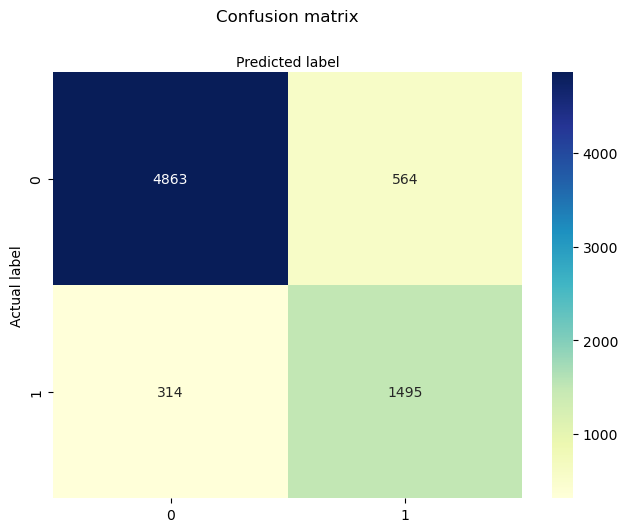

In [89]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8786622443338862

Precision: 0.7260806216610005

Recall: 0.8264234383637369

f1: 0.7730093071354704


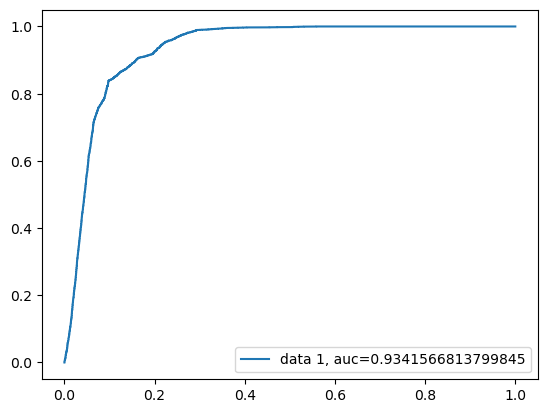

In [39]:
y_prob = logre.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_prob)
auc = metrics.roc_auc_score(y, y_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
from sklearn.utils import class_weight

Case 2 Checking if adding class weights help in improving accuracy

In [49]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y),
                                                 y=y)

In [54]:
class_weights = dict(zip(np.unique(y), class_weights))
class_weights

{0: 0.6666666666666666, 1: 2.0}

In [58]:
model = LogisticRegression(class_weight=class_weights)
model.fit(X, y)

LogisticRegression(class_weight={0: 0.6666666666666666, 1: 2.0})

In [78]:
y_pred=model.predict(X_test)

In [79]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4382, 1045],
       [ 158, 1651]])

Text(0.5, 427.9555555555555, 'Predicted label')

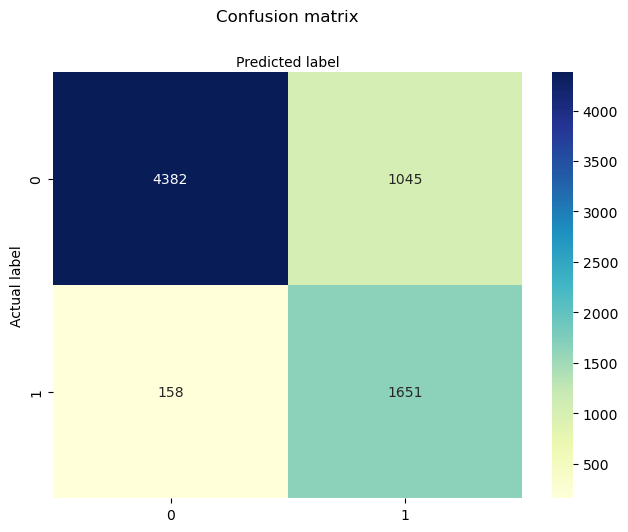

In [80]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Adding class weights caused the model to increase false positives. Hence it was not beneficial

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8337479270315091

Precision: 0.6123887240356083

Recall: 0.9126589275843007

f1: 0.7329633740288568


Case 3 Train Set includes only the highly accident prone cluster cores obtained from DBSCAN(2016-2018 included).  But test set is all accdents in 2019

In [63]:
feature_cols = ['tb_latitude', 'tb_longitude', 'collision_time', 'month', 'day_of_week',
       'weather_1']

X_test_no = df_test_no[feature_cols] 
y_test_no = df_test_no.accident

In [64]:
X_test_no.shape[0]

13692

In [82]:
logre = LogisticRegression()


logre.fit(X,y)
y_pred=logre.predict(X_test_no)

In [83]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_no, y_pred)
cnf_matrix

array([[9226, 1043],
       [ 608, 2815]])

Text(0.5, 427.9555555555555, 'Predicted label')

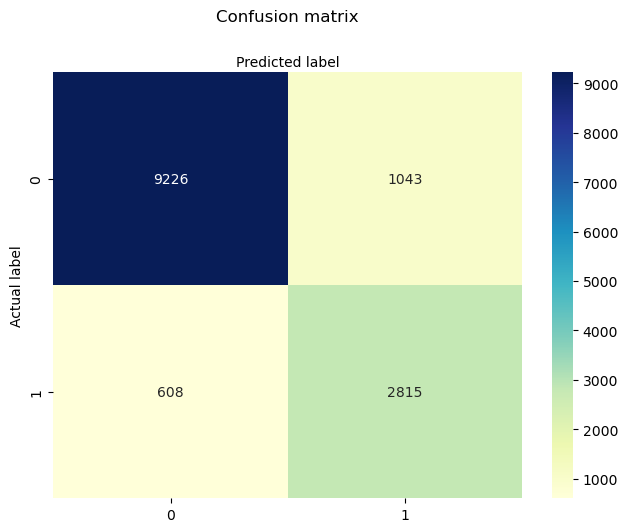

In [84]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test_no, y_pred))
print("Precision:",metrics.precision_score(y_test_no, y_pred))
print("Recall:",metrics.recall_score(y_test_no, y_pred))
print("f1:",metrics.f1_score(y_test_no, y_pred))

Accuracy: 0.8794186386210926

Precision: 0.7296526697770865

Recall: 0.822378030966988

f1: 0.7732454333195988


This model shows best performance. 
